In [56]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import bqplot as bq
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ipywidgets as widgets
from IPython.display import display, clear_output

In [57]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [58]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [59]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [60]:
# Define the city_position dictionary (same as before)
city_position = {
    'Alcalá de Henares': (40.4818396, -3.3644973),
    'Antwerp': (51.2211097, 4.3997081),
    'Augsburg': (48.3690341, 10.8979522),
    'Avignon': (43.9492493, 4.8059012),
    'Basel': (47.5581077, 7.5878261),
    'Bologna': (44.4938203, 11.3426327),
    'Bordeaux': (44.841225, -0.5800364),
    'Coimbra': (40.2111931, -8.4294632),
    'Cologne': (43.7218277, 0.9774958),
    'Dijon': (47.3215806, 5.0414701),
    'Dillingen an der Donau': (48.5812791, 10.4951026),
    'Dortmund': (51.5142273, 7.4652789),
    'Ferrara': (44.8372737, 11.6186451),
    'Florence': (43.7697955, 11.2556404),
    'Frankfurt am Main': (50.1106444, 8.6820917),
    'Frankfurt an der Oder': (52.3412273, 14.549452),
    'Geneva': (46.2047169, 6.1423106290939335),
    'Heidelberg': (49.4093582, 8.694724),
    'Ingolstadt': (48.7630165, 11.4250395),
    'Kraków': (50.0469432, 19.997153435836697),
    'Leiden': (52.1594747, 4.4908843),
    'Leipzig': (51.3406321, 12.3747329),
    'Lemgo': (52.0280674, 8.9012894),
    'Leuven': (50.879202, 4.7011675),
    'Lisbon': (38.7077507, -9.1365919),
    'London': (51.4893335, -0.14405508452768728),
    'Lyon': (45.7578137, 4.8320114),
    'Madrid': (40.4167047, -3.7035825),
    'Mainz': (50.0012314, 8.2762513),
    'Mexico City': (19.4326296, -99.1331785),
    'Milan': (45.4641943, 9.1896346),
    'Neustadt an der Weinstraße': (49.3539802, 8.1350021),
    'Nuremberg': (49.453872, 11.077298),
    'Padua': (45.4077172, 11.8734455),
    'Paris': (48.8534951, 2.3483915),
    'Perugia': (43.1119613, 12.3890104),
    'Pesaro': (43.9098114, 12.9131228),
    'Rome': (41.8933203, 12.4829321),
    'Saint Gervais': (45.2022356, 5.4820229),
    'Salamanca': (40.9651572, -5.6640182),
    'Seville': (37.3886303, -5.9953403),
    'Siena': (43.3185536, 11.3316533),
    'Sine loco': None,
    'Strasbourg': (48.584614, 7.7507127),
    'Tournon': (45.0675156, 4.832852),
    'Tübingen': (48.5236164, 9.0535531),
    'Valladolid': (41.6521328, -4.728562),
    'Venice': (45.4371908, 12.3345898),
    'Vienna': (48.2083537, 16.3725042),
    'Wittenberg': (51.8666527, 12.646761)
}

# Assuming 'merged_df' is your existing DataFrame and has a 'place' column
# Create a function to map the place name to latitude and longitude
def get_coordinates(city):
    return city_position.get(city, (None, None))  # Returns None if city is not found in the dictionary

# Apply the function to create 'latitude' and 'longitude' columns
df[['latitude', 'longitude']] = df['place'].apply(lambda city: pd.Series(get_coordinates(city)))

# Drop rows where 'latitude' or 'longitude' is NaN
#df = df.dropna(subset=['latitude', 'longitude'])

#df

In [61]:
# Define the updated mapping of places to categories
place_categories = {
    'Venice': 'Large centers',
    'Paris': 'Large centers',
    'Wittenberg': 'Large centers',
    'Antwerp': 'Medium centers',
    'Leipzig': 'Medium centers',
    'Frankfurt (Main)': 'Medium centers',
    'Lyon': 'Medium centers',
    'Cologne': 'Medium centers',
    'London': 'Medium centers',
    'Rome': 'Small centers',
    'Strasbourg': 'Small centers',
    'Seville': 'Small centers',
    'Leiden': 'Small centers',
    'Milan': 'Small centers',
    'Saint Gervais': 'Small centers',
    'Florence': 'Small centers',
    'Kraków': 'Small centers',
    'Salamanca': 'Small centers',
    'Lisbon': 'Small centers',
    'Bologna': 'Small centers',
    'Madrid': 'Small centers',
    'Sine loco': 'Small centers',
    'Basel': 'Small centers',
    'Lemgo': 'Small centers',
    'Dijon': 'Small centers',
    'Valladolid': 'Small centers',
    'Perugia': 'Small centers',
    'Siena': 'One book centers',
    'Avignon': 'One book centers',
    'Vienna': 'One book centers',
    'Ferrara': 'One book centers',
    'Padua': 'One book centers',
    'Nuremberg': 'One book centers',
    'Neustadt an der Weinstraße': 'One book centers',
    'Mexico City': 'One book centers',
    'Mainz': 'One book centers',
    'Coimbra': 'One book centers',
    'Leuven': 'One book centers',
    'Ingolstadt': 'One book centers',
    'Heidelberg': 'One book centers',
    'Geneva': 'One book centers',
    'Dillingen an der Donau': 'One book centers',
    'Alcalá de Henares': 'One book centers'
}

# Ensure 'place' column exists in merged_df and is in the format we expect
df['place'] = df['place'].astype(str)

# Create the 'place_category' column by mapping the 'place' column to categories
df['place_category'] = df['place'].map(place_categories)

In [62]:
df['cks'] = df['cks'].astype(str)
df['cks'] = df['cks'].str.split(', ')
df_exploded = df.explode('cks')

# Remove brackets, single quotes, double quotes, and leading/trailing whitespace
df_exploded['cks'] = df_exploded['cks'].str.replace(r"[\[\]\"']", "", regex=True).str.strip()

df_exploded.reset_index(drop=True, inplace=True)

In [63]:
# Count unique values in the specified column
unique_count = df_exploded['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 20540


In [64]:
df_exploded['year'] = df_exploded['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650'
]

# Add 'interval' column to the filtered_df DataFrame based on custom bins
df_exploded['interval'] = pd.cut(df_exploded['year'], bins=bins, labels=labels, right=False)

In [65]:
# Drop rows with NaN values in latitude and longitude columns
df_exploded = df_exploded.dropna(subset=['longitude', 'latitude'])

In [66]:
#create a set of data frames by intervals

# List of cks values for "Motion of the Eighth Sphere"
motion_cks_values = [
    'CK_Motion of the Eighth Sphere',
    'CK_Motion of the Eighth Sphere at Boundary',
    'CK_Complete Motion of the Eighth Sphere (Thebit)',
    'CK_Complete Motion of the Eighth Sphere'
]

# Get unique interval values
unique_intervals = df_exploded['interval'].unique()

# Initialize a list to store the new DataFrames for each interval
final_data = []

# For each interval, perform the operations
for interval in unique_intervals:
    # Filter df_exploded by the current interval
    interval_df = df_exploded[df_exploded['interval'] == interval]
    
    # Get unique places for the current interval
    unique_places = interval_df['place'].unique()

    # Initialize a list to store rows for the current interval
    interval_data = []

    # Loop through each place for this interval
    for place in unique_places:
        # Initialize the row with the place and interval
        row = {'place': place, 'interval': interval}

        cut = interval_df['place'] == place
        latitude = interval_df[cut].latitude.values[0]
        longitude = interval_df[cut].longitude.values[0]

        row['latitude'] = latitude
        row['longitude'] = longitude

        
        # Check if there are any images for this place in the current interval
        row['images'] = "Yes" if interval_df[(interval_df['place'] == place) & (interval_df['images'].notna())].shape[0] > 0 else "No"
        
        # Check if "CK_Daily Rotation of the Firmament" is present for this place in the current interval
        row['CK_Daily Rotation of the Firmament'] = "Yes" if "CK_Daily Rotation of the Firmament" in interval_df[(interval_df['place'] == place)]['cks'].values else "No"
        
        # Check if any of the "Motion of the Eighth Sphere" cks values are present for this place in the current interval
        row['Motion of the Eighth Sphere'] = "Yes" if any(val in interval_df[(interval_df['place'] == place)]['cks'].values for val in motion_cks_values) else "No"

        
        # Append the row to the interval_data
        interval_data.append(row)
    
    # Create a DataFrame for this interval and append it to the final_data list
    interval_df_final = pd.DataFrame(interval_data)
    final_data.append(interval_df_final)
    

In [67]:
final_data[4]

,place,interval,latitude,longitude,images,CK_Daily Rotation of the Firmament,Motion of the Eighth Sphere
0,Wittenberg,1550-1569,51.866653,12.646761,Yes,Yes,No
1,Paris,1550-1569,48.853495,2.348391,Yes,Yes,No
2,Lyon,1550-1569,45.757814,4.832011,Yes,Yes,No
3,Antwerp,1550-1569,51.221110,4.399708,Yes,Yes,No
4,Venice,1550-1569,45.437191,12.334590,Yes,Yes,Yes
5,London,1550-1569,51.489334,-0.144055,Yes,No,No
6,Basel,1550-1569,47.558108,7.587826,Yes,Yes,Yes
7,Cologne,1550-1569,43.721828,0.977496,Yes,Yes,No
8,Leipzig,1550-1569,51.340632,12.374733,Yes,Yes,No
9,Seville,1550-1569,37.388630,-5.995340,Yes,No,No


In [68]:
def create_map_with_cities(df):
        # Define the boundaries for Europe
    min_lon = -25  # Westernmost point of Europe
    max_lon = 40   # Easternmost point of Europe
    min_lat = 35   # Southernmost point of Europe
    max_lat = 71   # Northernmost point of Europe
    
    # Create a new figure with Cartopy projection
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Add base map features
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    
    # Set map bounds to focus on Europe
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
    
    # Set title for the map
    ax.set_title("Map Focused on Europe")

    places = df['place'].values
    latitude = df['latitude'].values
    longitude = df['longitude'].values

    colors = []

    for i, row in df.iterrows():
        value1 = row['CK_Daily Rotation of the Firmament']
        value2 = row['Motion of the Eighth Sphere']
        if value1 == 'Yes' and value2 == 'No': 
            colors.append('red')
        if value1 == 'Yes' and value2 =='Yes':
            colors.append('yellow')
        if value1 == 'No' and value2 == 'Yes':
            colors.append('green')
        if value1 == 'No' and value2 == 'No':
            colors.append('grey')    
        # else: 
        #     colors.append('black')
    
    ax.scatter(longitude,latitude,  c=colors)
    plt.draw()  # Redraw the current figure when plotting the new data




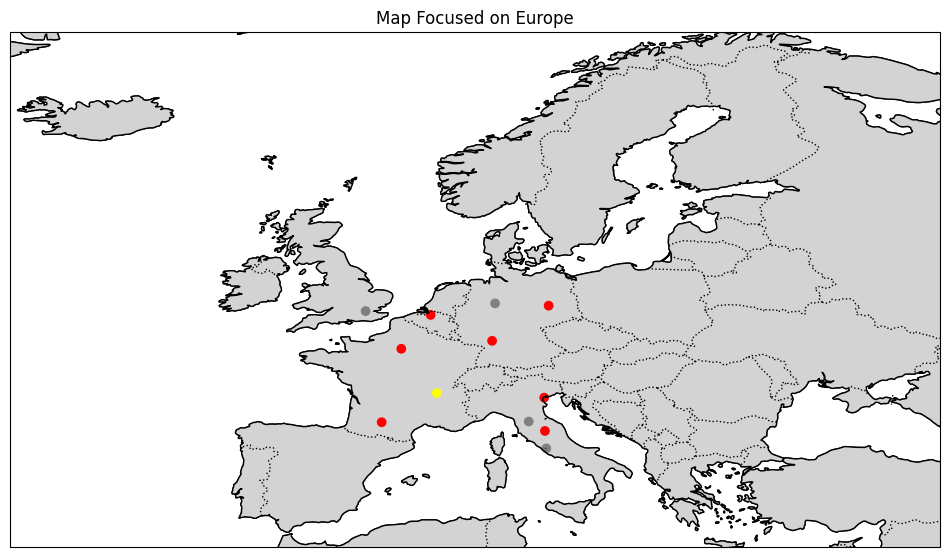

In [69]:
create_map_with_cities(final_data[5])

In [70]:
num_dfs = len(final_data)
print(f"Number of DataFrames: {num_dfs}")


Number of DataFrames: 9


In [71]:
# 2. Checking if each DataFrame has column titles
for idx, df in enumerate(final_data):
    columns = df.columns.tolist()  # Get column names as a list
    if columns:  # If there are column titles
        print(f"DataFrame {idx+1} has the following column titles: {columns}")
    else:
        print(f"DataFrame {idx+1} has no column titles.")

DataFrame 1 has the following column titles: ['place', 'interval', 'latitude', 'longitude', 'images', 'CK_Daily Rotation of the Firmament', 'Motion of the Eighth Sphere']
DataFrame 2 has the following column titles: ['place', 'interval', 'latitude', 'longitude', 'images', 'CK_Daily Rotation of the Firmament', 'Motion of the Eighth Sphere']
DataFrame 3 has the following column titles: ['place', 'interval', 'latitude', 'longitude', 'images', 'CK_Daily Rotation of the Firmament', 'Motion of the Eighth Sphere']
DataFrame 4 has the following column titles: ['place', 'interval', 'latitude', 'longitude', 'images', 'CK_Daily Rotation of the Firmament', 'Motion of the Eighth Sphere']
DataFrame 5 has the following column titles: ['place', 'interval', 'latitude', 'longitude', 'images', 'CK_Daily Rotation of the Firmament', 'Motion of the Eighth Sphere']
DataFrame 6 has the following column titles: ['place', 'interval', 'latitude', 'longitude', 'images', 'CK_Daily Rotation of the Firmament', 'Moti

IntSlider(value=0, description='DataFrame Index', max=8)

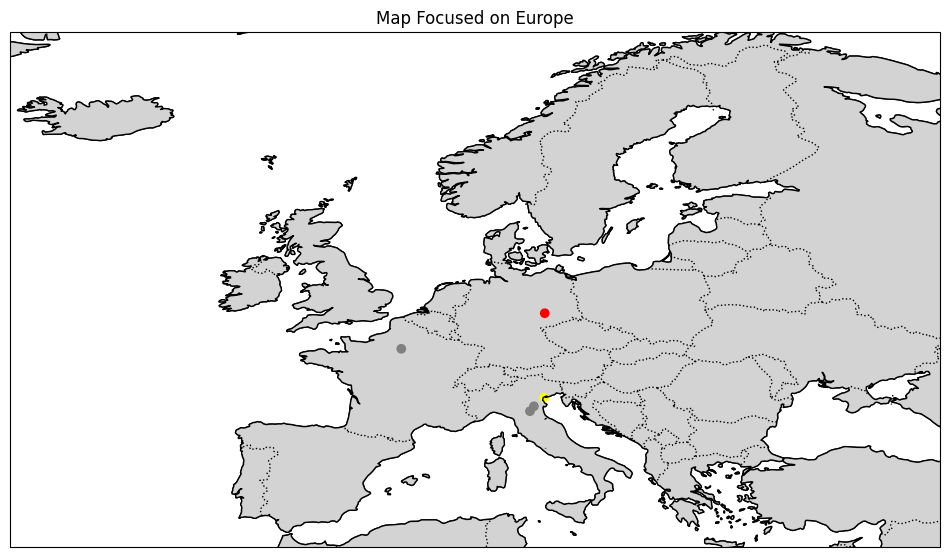

In [72]:
# Step 1: Create the slider widget
slider = widgets.IntSlider(value=0, min=0, max=len(final_data)-1, step=1, description='DataFrame Index')

# Step 2: Function to update the map when the slider is changed
def update_map(change):
    # Clear the previous plot before displaying the new one
    clear_output(wait=True)  # Clears the previous plot in Jupyter Notebooks
    
    # Get the selected DataFrame based on the slider value
    selected_df = final_data[slider.value]
    
    # Call the create_map_with_cities function to plot the selected DataFrame
    create_map_with_cities(selected_df)  # This will create the map or plot for the selected DataFrame
    
    # Display the slider after the map is updated (to make sure the slider stays visible)
    display(slider)

# Step 3: Link the slider to the update_map function
slider.observe(update_map, names='value')

# Step 4: Display the slider and trigger the initial plot
display(slider)

# Trigger the first plot when the code runs (optional, but useful for the first view)
update_map({'new': slider.value})


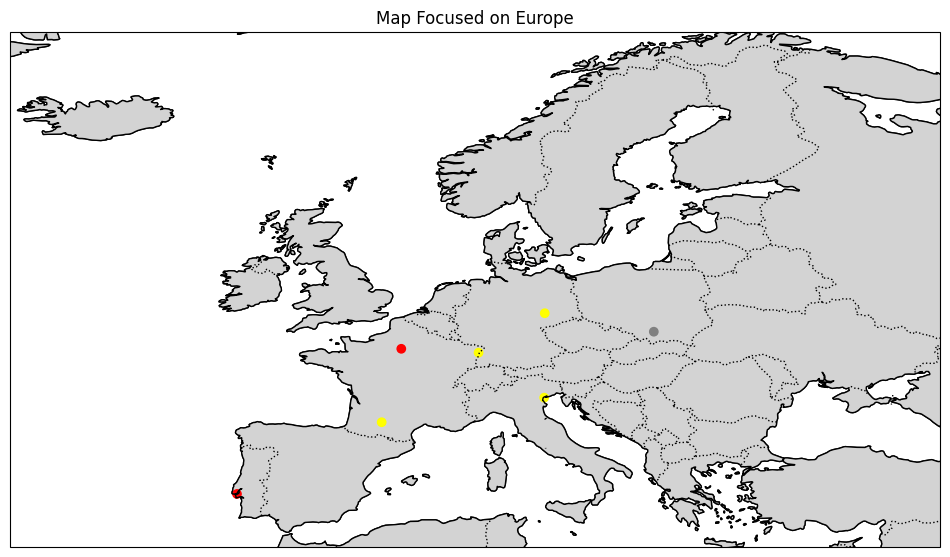

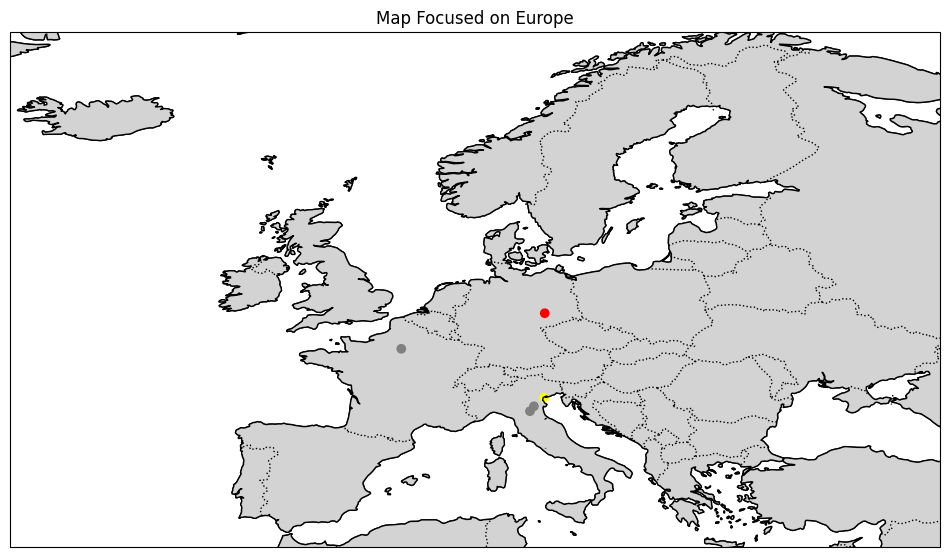

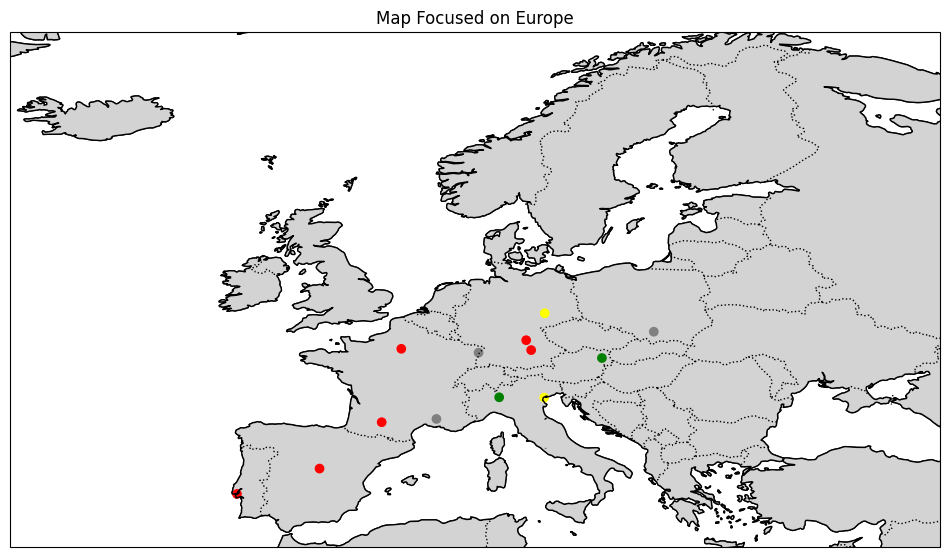

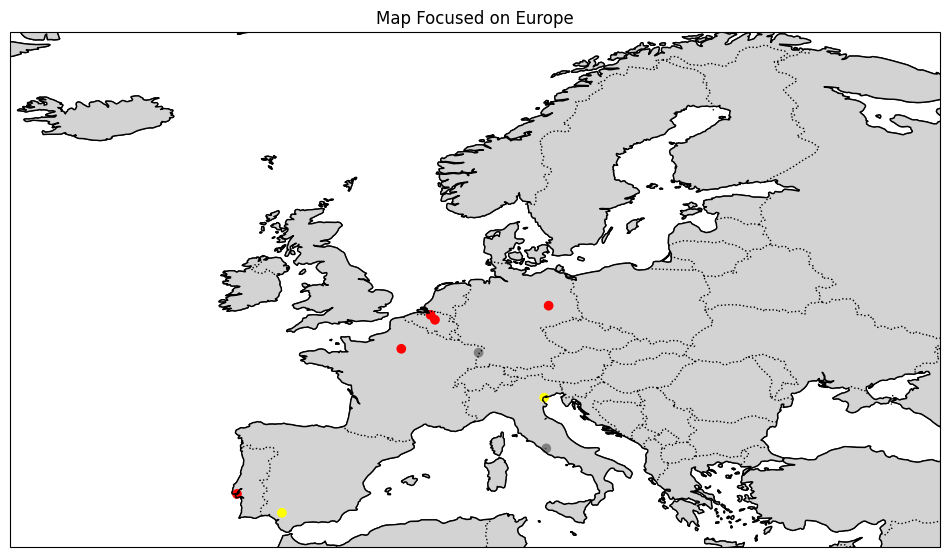

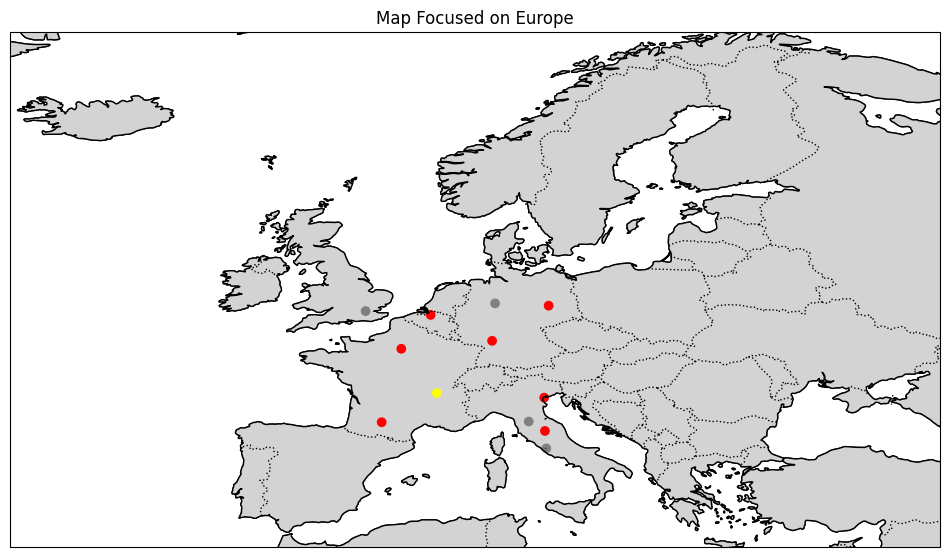

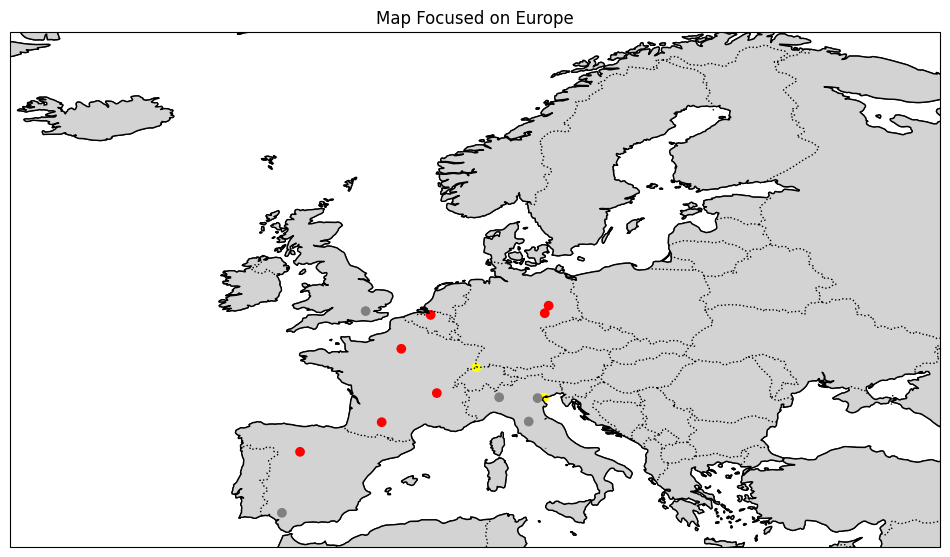

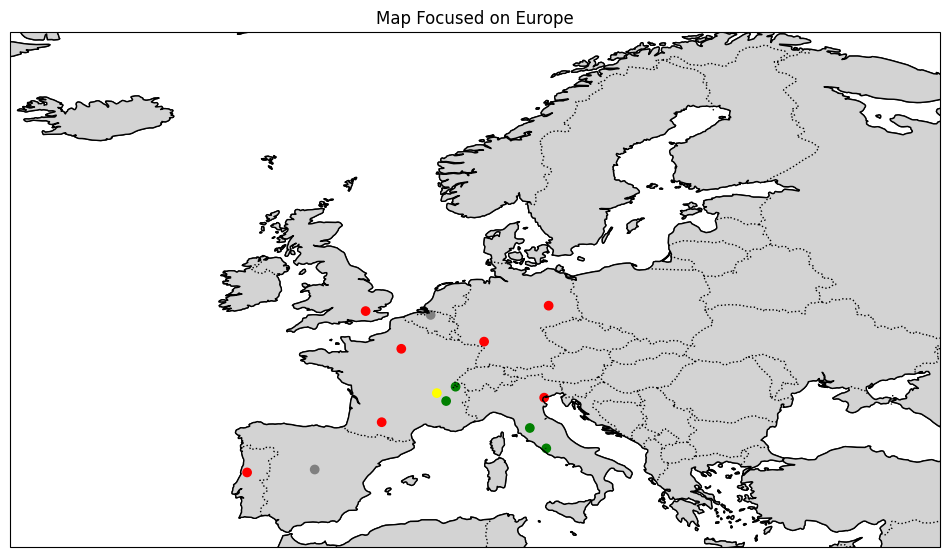

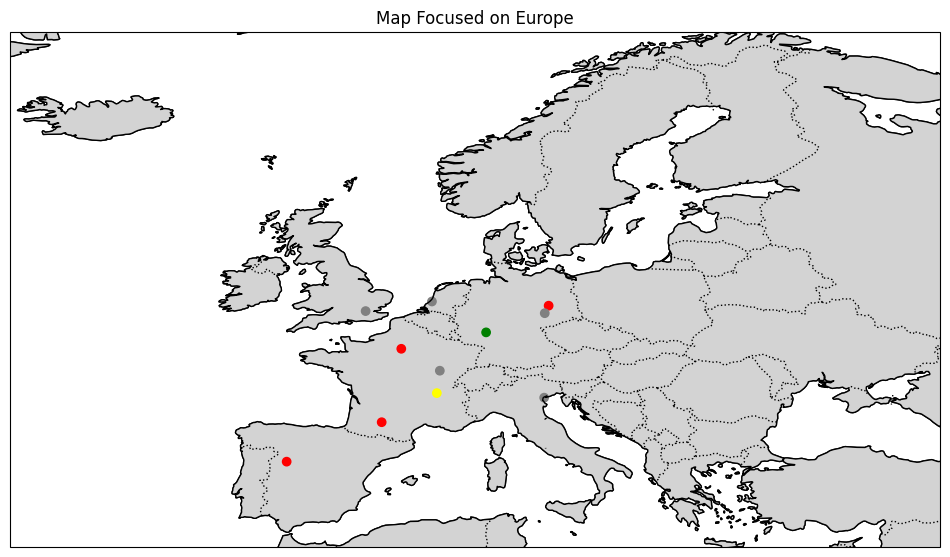

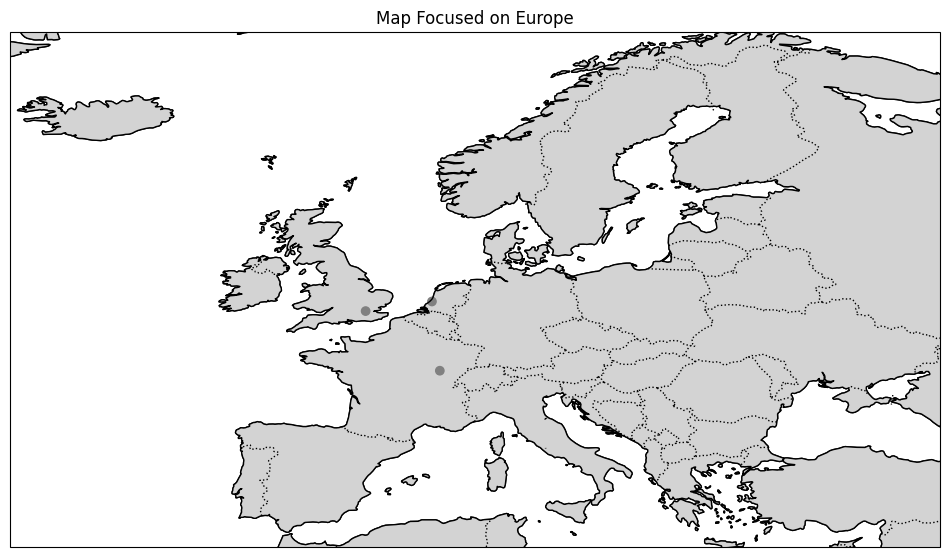

In [42]:
# Loop through each DataFrame in final_data and apply the function
for df in final_data:
    create_map_with_cities(df)  # Apply the function to each DataFrame
